In [ ]:
#@title Importing Packages 
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [ ]:
#@title Functions
def find_Pr(n, k, N):
  count = 0
  for i in range(N):
    Quality = np.array(rnd.sample(range(n), n))
    if max(Quality[:k]) != max(Quality):
      first_better = np.where(Quality > max(Quality[:k]))[0][0]
      if Quality[first_better] == max(Quality):
        count += 1
  Pr = count / N
  return Pr

def Distribution(stdNum):
  np.random.seed(1)
  popSize = 1000 

  a1 = stdNum - int(stdNum / 10) * 10
  a2 = int((stdNum - int(stdNum / 100) * 100)/10)
  a3 = int(stdNum / 100)

  mu1, sigma1 = a1/2, np.abs(0.5 + 3*a2/10)
  mu2, sigma2 = -1 * a2/2, np.abs(1 + 3*a3/10)
  mu3, sigma3 = a3/2, np.abs(2 + 3*a1/10)

  distributions = [
  {"type": np.random.normal, "kwargs": {"loc": mu1, "scale": sigma1}},
  {"type": np.random.normal, "kwargs": {"loc": mu2, "scale": sigma2}},
  {"type": np.random.normal, "kwargs": {"loc": mu3, "scale": sigma3}},
  ]
  coefficients = np.array([0.4, 0.25, 0.35])
  coefficients /= coefficients.sum()
  popSize = 100000

  num_distr = len(distributions)
  data = np.zeros((popSize, num_distr))
  for idx, distr in enumerate(distributions):
      data[:, idx] = distr["type"](size=(popSize,), **distr["kwargs"])
  random_idx = np.random.choice(np.arange(num_distr), size=(popSize,), p=coefficients)
  Population = data[np.arange(popSize), random_idx]

  return Population

def Dist(Pop, s, n):
  Means = []
  for i in range(s):
    rnd_pop = rnd.sample(list(Pop), n)
    Means.append(np.mean(rnd_pop))
  sns.distplot(Means, 20)
  mean = np.mean(Means)
  var = np.var(Means)
  return mean, var


>Part 1: Secretary Problem

Text(0.5, 1.0, 'Probability of choosing the best secretary')

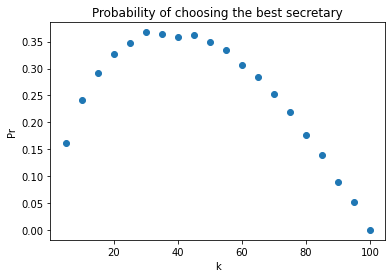

In [ ]:
#@title Problem 1. Probability of choosing the best secretary for constant 'n' (finding the best 'k') 
n = 100
k = range(5, 101, 5)
N = 10000
Pr = []
for i in k:
  Pr.append(find_Pr(n, i, N))
plt.scatter(k, Pr)
plt.xlabel('k')
plt.ylabel('Pr')
plt.title('Probability of choosing the best secretary')

Text(0.5, 1.0, 'Probability of choosing the best secretary (k = n/e)')

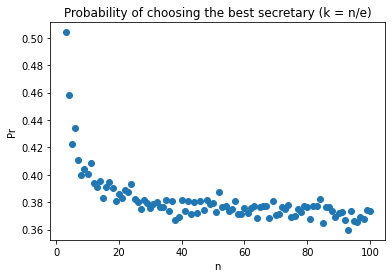

In [ ]:
#@title Problem 2. Probability of choosing the best secretary for k = n/e 
n = range(3,101)
N = 10000
Pr = []
for i in n:
  k = int(i / np.exp(1))
  Pr.append(find_Pr(i, k, N))
plt.scatter(n, Pr)
plt.xlabel('n')
plt.ylabel('Pr')
plt.title('Probability of choosing the best secretary (k = n/e)')


> Part 2: Central Limit Theorem Analysis


Population: mean = 1.575, variance = 0.021


Text(0.5, 1.0, 'Distribution for std_num = 369')

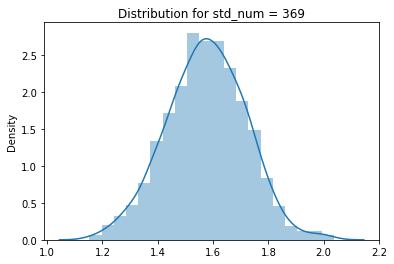

In [ ]:
#@title Population Distribution
Population = Distribution(369)
mean, var = Dist(Population, s = 1000, n = 1000)
print(f'Population: mean = {round(mean, 3)}, variance = {round(var, 3)}')
plt.title('Distribution for std_num = 369')

Wine: mean = 2.612, variance = 0.501


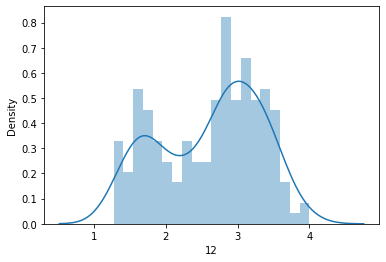

In [ ]:
#@title Wine Distribution
wine = pd.read_csv('wine.csv')['12']
sns.distplot(wine, bins = 20)
Mean = np.mean(wine)
Var = np.var(wine)
print(f'Wine: mean = {round(Mean, 3)}, variance = {round(Var, 3)}')

Central Limit Theorem Analysis:
n = 10:
	 mean = 2.598, variance = 0.04849
CLT:	 mean = 2.612, variance = 0.05013
n = 20:
	 mean = 2.615, variance = 0.02041
CLT:	 mean = 2.612, variance = 0.02506
n = 30:
	 mean = 2.612, variance = 0.01391
CLT:	 mean = 2.612, variance = 0.01671
n = 40:
	 mean = 2.616, variance = 0.00994
CLT:	 mean = 2.612, variance = 0.01253
n = 50:
	 mean = 2.612, variance = 0.00716
CLT:	 mean = 2.612, variance = 0.01003
n = 60:
	 mean = 2.612, variance = 0.00575
CLT:	 mean = 2.612, variance = 0.00835
n = 70:
	 mean = 2.615, variance = 0.00434
CLT:	 mean = 2.612, variance = 0.00716
n = 80:
	 mean = 2.614, variance = 0.00337
CLT:	 mean = 2.612, variance = 0.00627
n = 90:
	 mean = 2.608, variance = 0.00292
CLT:	 mean = 2.612, variance = 0.00557
n = 100:
	 mean = 2.612, variance = 0.00204
CLT:	 mean = 2.612, variance = 0.00501
n = 110:
	 mean = 2.612, variance = 0.00161
CLT:	 mean = 2.612, variance = 0.00456
n = 120:
	 mean = 2.613, variance = 0.00134
CLT:	 mean = 2.612, 

Text(0.5, 0.98, 'Wine distribution for the n different values (s = 1000)')

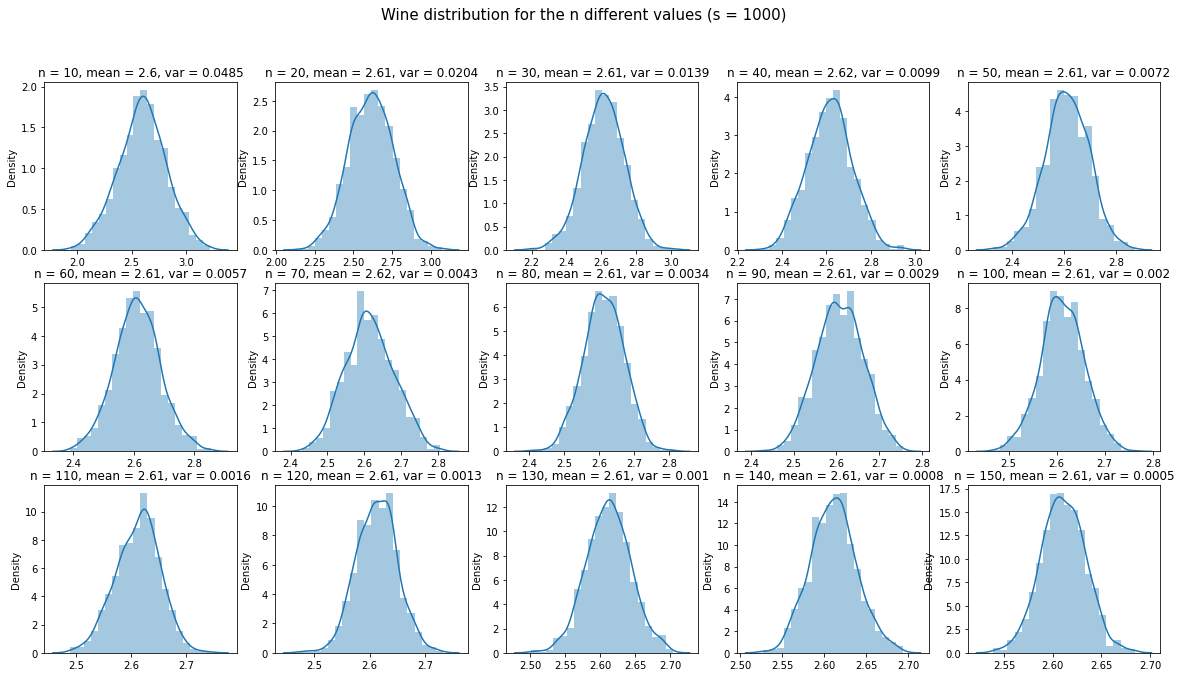

In [ ]:
#@title Wine Distribution for the n different values 
N = range(10, 151, 10)
print('Central Limit Theorem Analysis:')
plt.figure(figsize=(20, 10.5)) 
for i in range(15):
  plt.subplot(3, 5, i+1)
  mean, var = Dist(wine, 1000, N[i])
  plt.title(f'n = {N[i]}, mean = {round(mean, 2)}, var = {round(var, 4)}')
  print(f'n = {N[i]}:\n\t mean = {round(mean, 3)}, variance = {round(var, 5)}\nCLT:\t mean = {round(Mean, 3)}, variance = {round(Var/N[i], 5)}')
plt.suptitle('Wine distribution for the n different values (s = 1000)', fontsize = 15)